# Simpson's Paradox
Use `admission_data.csv` for this exercise.

In [68]:
# Load and view first few lines of dataset
# intersting... the describe and scatter_matrix functions are not working...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
admits = pd.read_csv('admission_data.csv')
admits.head()

,student_id,gender,major,admitted
0,35377,female,Chemistry,False
1,56105,male,Physics,True
2,31441,female,Chemistry,False
3,51765,male,Physics,True
4,53714,female,Physics,True


In [69]:
admits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  500 non-null    int64 
 1   gender      500 non-null    object
 2   major       500 non-null    object
 3   admitted    500 non-null    bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 12.3+ KB


In [70]:
admits.describe(include = 'object')
#df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
#pd.plotting.scatter_matrix(df, alpha=0.2);
#df.info()

,gender,major
count,500,500
unique,2,2
top,female,Physics
freq,257,256


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

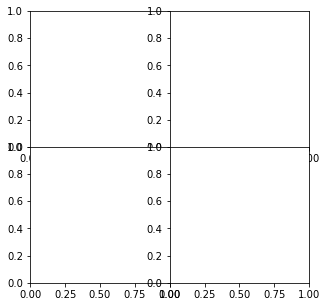

In [71]:
pd.plotting.scatter_matrix(admits, figsize=(5,5));

### Proportion and admission rate for each gender

In [52]:
# Proportion of students that are female
print(len(admits[admits['gender']=='female']))
print(admits.shape[0])

257
500


In [6]:
# Proportion of students that are male
(len(admits[admits['gender']=='male']))/admits.shape[0]

0.486

In [7]:
# Admission rate for females
(len(admits[admits['gender']=='female']))/admits.shape[0]

0.514

In [8]:
# Admission rate for males
len(admits[(admits['gender']=='male') & (admits['admitted'])])/(len(admits[admits['gender']=='male']))

0.48559670781893005

In [9]:
# Admission rates for females
len(admits[(admits['gender']=='female') & (admits['admitted'])])/(len(admits[admits['gender']=='female']))

0.28793774319066145

### Proportion and admission rate for physics majors of each gender

In [12]:
# What proportion of female students are majoring in physics?
fem_phys_rate = admits.query("gender == 'female' & major == 'Physics'").count()/ \
    (admits.query("gender == 'female'").count())
print(fem_phys_rate)

student_id    0.120623
gender        0.120623
major         0.120623
admitted      0.120623
dtype: float64


In [13]:
# What proportion of male students are majoring in physics?
fem_phys_rate = admits.query("gender == 'male' & major == 'Physics'").count()/ \
    (admits.query("gender == 'male'").count())
print(fem_phys_rate)

student_id    0.925926
gender        0.925926
major         0.925926
admitted      0.925926
dtype: float64


In [15]:
# Admission rate for female physics majors
len(admits[(admits["gender"]=='female') & (admits["major"] == 'Physics') & \
           admits["admitted"]]) / len(admits[(admits["gender"]=='female') & (admits["major"] == 'Physics')])

0.7419354838709677

In [16]:
# Admission rate for male physics majors
len(admits[(admits["gender"]=='male') & (admits["major"] == 'Physics') & \
           admits["admitted"]]) / len(admits[(admits["gender"]=='male') & (admits["major"] == 'Physics')])

0.5155555555555555

### Proportion and admission rate for chemistry majors of each gender

In [17]:
# What proportion of female students are majoring in chemistry?
len(admits[(admits['gender']=='female') & (admits['major'] == 'Chemistry')]) / len(admits[admits['gender']=='female'])

0.8793774319066148

In [18]:
# What proportion of male students are majoring in chemistry?
len(admits[(admits['gender']=='male') & (admits['major'] == 'Chemistry')]) / len(admits[admits['gender']=='male'])

0.07407407407407407

In [19]:
# Admission rate for female chemistry majors
len(admits[(admits['gender']=='female') & (admits['major'] == 'Chemistry') & \
           admits['admitted']]) / len(admits[(admits['gender']=='female') & (admits['major'] == 'Chemistry')])

0.22566371681415928

In [20]:
# Admission rate for male chemistry majors
len(admits[(admits['gender']=='male') & (admits['major'] == 'Chemistry') & \
           admits['admitted']]) / len(admits[(admits['gender']=='male') & (admits['major'] == 'Chemistry')])

0.1111111111111111

### Admission rate for each major

In [21]:
# Admission rate for physics majors
len(admits[(admits['major'] == 'Physics') & admits['admitted']]) / len(admits[(admits['major'] == 'Physics')])

0.54296875

In [22]:
# Admission rate for chemistry majors
len(admits[(admits['major'] == 'Chemistry') & admits['admitted']]) / len(admits[(admits['major'] == 'Chemistry')])

0.21721311475409835